In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [137]:
train = pd.read_csv('/Users/apple/Desktop/Data science/datasets/Restaurant Revenue Prediction/train.csv')
test = pd.read_csv('/Users/apple/Desktop/Data science/datasets/Restaurant Revenue Prediction/test.csv')

full_data = [train, test]

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [139]:
pd.set_option("display.max_columns",45)

In [140]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,12.500000,12.500000,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [141]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [142]:
#delete the Id column
test_Ids = test['Id']
for dataset in full_data:
    dataset.drop(['Id'], axis=1, inplace=True)

In [143]:
#City
print(train[['City', 'revenue']].groupby(['City'], as_index=False).mean().sort_values(by=['revenue']))

              City       revenue
22      Kırklareli  1.619683e+06
30            Uşak  1.763231e+06
9          Denizli  2.344689e+06
20           Konya  2.667256e+06
28           Tokat  2.675511e+06
2           Amasya  2.954086e+06
21         Kütahya  2.993069e+06
26          Samsun  3.247870e+06
33       Şanlıurfa  3.261924e+06
17       Kastamonu  3.273041e+06
3           Ankara  3.275406e+06
27        Tekirdağ  3.312471e+06
25         Sakarya  3.328853e+06
24        Osmaniye  3.376145e+06
5            Aydın  3.429798e+06
4          Antalya  3.481448e+06
10      Diyarbakır  3.735351e+06
19         Kocaeli  3.745135e+06
16         Karabük  3.807496e+06
13       Eskişehir  3.957953e+06
15         Isparta  4.015749e+06
8            Bursa  4.092295e+06
23           Muğla  4.111129e+06
7             Bolu  4.263629e+06
14       Gaziantep  4.316715e+06
18         Kayseri  4.567576e+06
6        Balıkesir  4.758476e+06
0            Adana  4.894944e+06
1   Afyonkarahisar  4.952497e+06
29        

In [144]:
#Date

In [145]:
for dataset in full_data:
    dataset['Open Date'] = pd.to_datetime(dataset['Open Date'], dayfirst=True)

In [146]:
for dataset in full_data:
    dataset['Open Year'] = dataset['Open Date'].apply(lambda x: x.year)
    dataset['Open Month'] = dataset['Open Date'].apply(lambda x: x.month)

In [147]:
print(train[['Open Year', 'revenue']].groupby(['Open Year'], as_index=False).mean().sort_values(by=['revenue']))

    Open Year       revenue
16       2014  2.464944e+06
15       2013  2.532287e+06
6        2004  3.482435e+06
14       2012  3.837859e+06
0        1996  3.903884e+06
13       2011  4.147879e+06
8        2006  4.203972e+06
2        1998  4.251905e+06
1        1997  4.286645e+06
12       2010  4.383878e+06
11       2009  4.652457e+06
10       2008  4.876962e+06
5        2002  4.991022e+06
9        2007  5.079333e+06
7        2005  6.611118e+06
3        1999  7.329030e+06
4        2000  1.359602e+07


In [148]:
print(train[['Open Month', 'revenue']].groupby(['Open Month'], as_index=False).mean().sort_values(by=['revenue']))

    Open Month       revenue
1            2  3.526847e+06
4            5  3.762083e+06
7            8  3.845078e+06
3            4  3.984870e+06
5            6  4.047917e+06
2            3  4.199141e+06
10          11  4.223851e+06
8            9  4.414270e+06
0            1  4.592720e+06
9           10  4.645738e+06
11          12  5.007918e+06
6            7  6.696920e+06


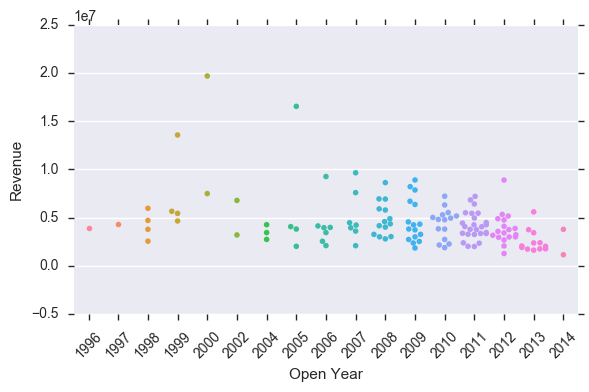

In [149]:
sns.swarmplot(x='Open Year', y='revenue', data=train, size=4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Open Year')
plt.ylabel('Revenue')

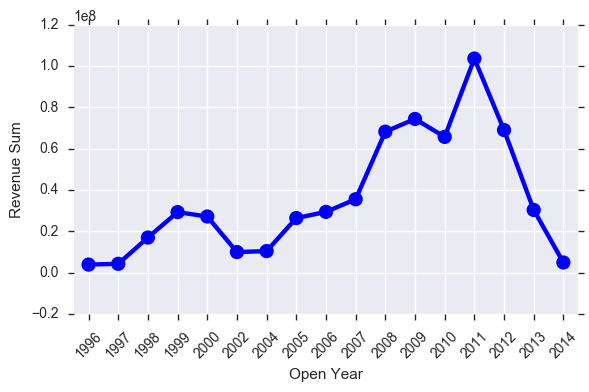

In [150]:
df = train[['Open Year', 'revenue']].groupby(['Open Year'], as_index=False).sum()
sns.pointplot(x='Open Year', y='revenue', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.xlabel('Open Year')
plt.ylabel('Revenue Sum')

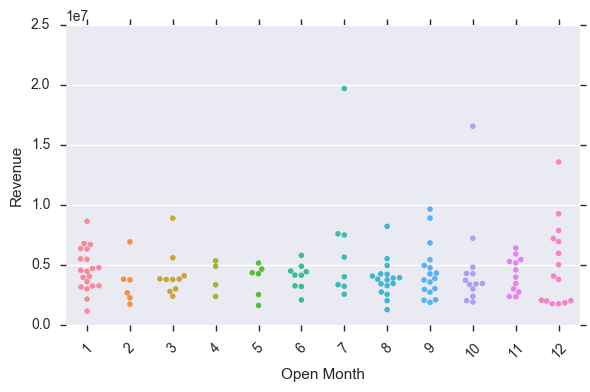

In [151]:
sns.swarmplot(x='Open Month', y='revenue', data=train, size=4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Open Month')
plt.ylabel('Revenue')

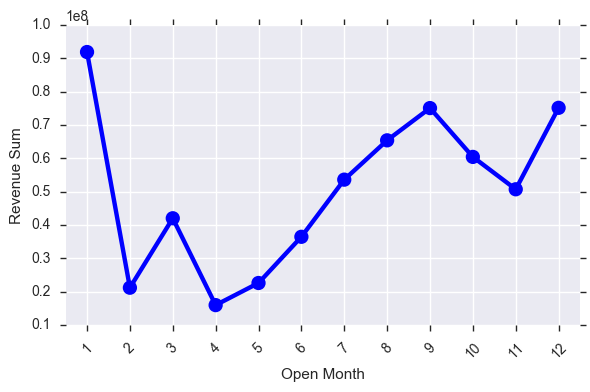

In [152]:
df = train[['Open Month', 'revenue']].groupby(['Open Month'], as_index=False).sum()
sns.pointplot(x='Open Month', y='revenue', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.xlabel('Open Month')
plt.ylabel('Revenue Sum')

In [153]:
#City Group

In [154]:
train['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [155]:
print(train[['City Group', 'revenue']].groupby(['City Group'], as_index=False).mean().sort_values(by=['revenue']))

   City Group       revenue
1       Other  3.752924e+06
0  Big Cities  4.983480e+06


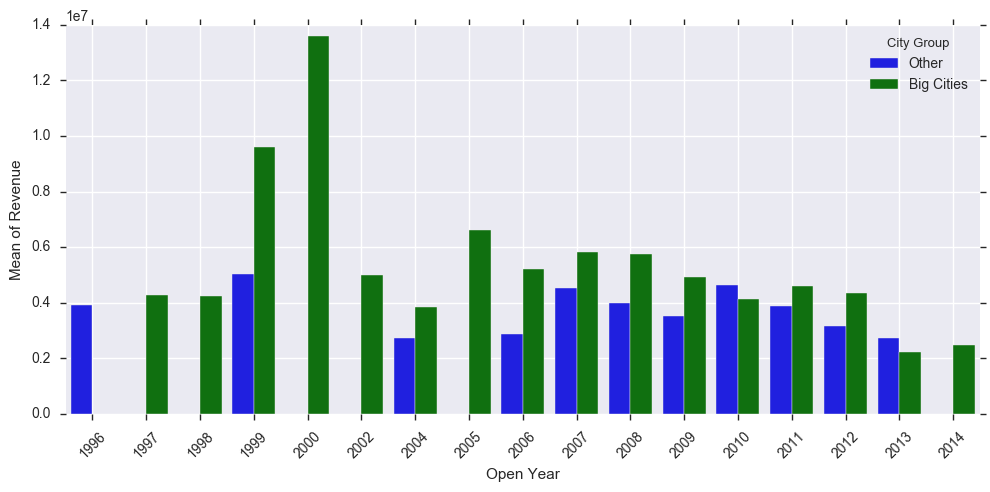

In [156]:
df = train[['City Group', 'revenue', 'Open Year']].groupby(['Open Year', 'City Group'], as_index=False).mean()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Open Year', y='revenue', hue='City Group', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.xlabel('Open Year')
plt.ylabel('Mean of Revenue')

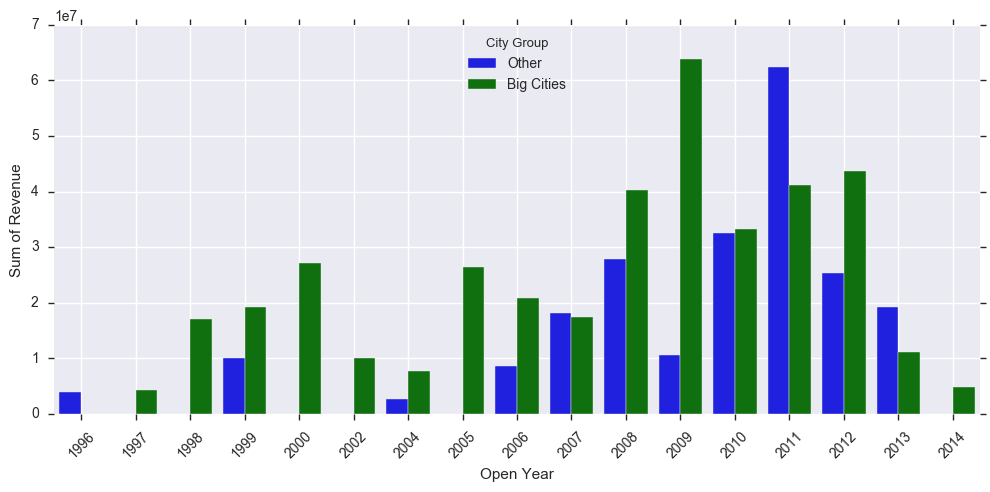

In [157]:
df = train[['City Group', 'revenue', 'Open Year']].groupby(['Open Year', 'City Group'], as_index=False).sum()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Open Year', y='revenue', hue='City Group', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.xlabel('Open Year')
plt.ylabel('Sum of Revenue')

In [158]:
#Type of the restaurant

In [159]:
train['Type'].unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [160]:
test['Type'].unique()

array(['FC', 'IL', 'DT', 'MB'], dtype=object)

In [161]:
train['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [162]:
print(train[['Type', 'revenue']].groupby(['Type'], as_index=False).mean().sort_values(by=['revenue']))

  Type       revenue
0   DT  3.810007e+06
2   IL  4.172379e+06
1   FC  4.683963e+06


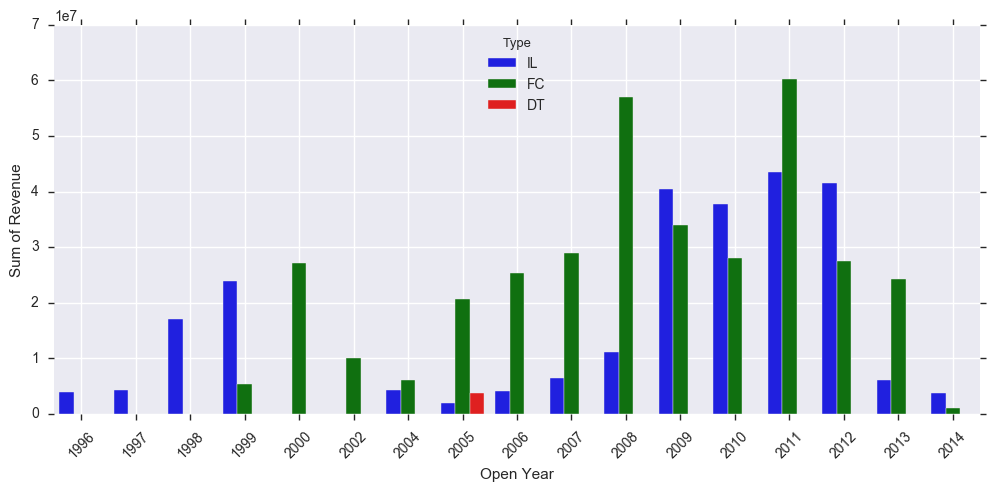

In [163]:
df = train[['Type', 'revenue', 'Open Year']].groupby(['Open Year', 'Type'], as_index=False).sum()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Open Year', y='revenue', hue='Type', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.xlabel('Open Year')
plt.ylabel('Sum of Revenue')

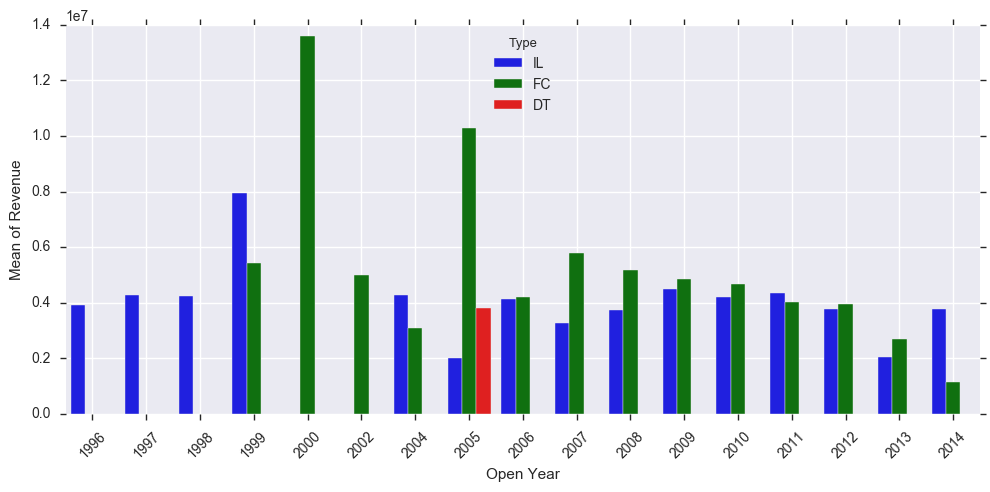

In [164]:
df = train[['Type', 'revenue', 'Open Year']].groupby(['Open Year', 'Type'], as_index=False).mean()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Open Year', y='revenue', hue='Type', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.xlabel('Open Year')
plt.ylabel('Mean of Revenue')

In [165]:
#City

In [166]:
train['City'].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [167]:
test['City'].unique()

array(['Niğde', 'Konya', 'Ankara', 'Kocaeli', 'Afyonkarahisar',
       'Eskişehir', 'Rize', 'İstanbul', 'Trabzon', 'Antalya', 'Muğla',
       'Düzce', 'Adana', 'Bursa', 'Aydın', 'Hatay', 'Denizli', 'İzmir',
       'Gaziantep', 'Samsun', 'Erzurum', 'Edirne', 'Balıkesir', 'Mersin',
       'Zonguldak', 'Malatya', 'Çanakkale', 'Kars', 'Bolu', 'Batman',
       'Bilecik', 'Giresun', 'Tekirdağ', 'Sivas', 'Kırıkkale', 'Mardin',
       'Erzincan', 'Manisa', 'Diyarbakır', 'Kahramanmaraş', 'Yalova',
       'Tanımsız', 'Sakarya', 'Kırşehir', 'Aksaray', 'Kayseri', 'Nevşehir',
       'Çorum', 'Ordu', 'Kırklareli', 'Şanlıurfa', 'Artvin', 'Uşak',
       'Kütahya', 'Siirt', 'Çankırı', 'Isparta'], dtype=object)

In [168]:
#Ps

In [169]:
!pip install pandas-profiling

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [170]:
import pandas_profiling

In [171]:
pandas_profiling.ProfileReport(train)

Number of variables,44
Number of observations,137
Total Missing (%),0.0%
Total size in memory,47.2 KiB
Average record size in memory,352.6 B
Numeric,27
Categorical,3
Date,1
Text (Unique),0
Rejected,13
Distinct count,34


In [172]:
for dataset in full_data:
    dataset.drop(['P36', 'P35', 'P34', 'P32', 'P31', 'P26', 'P25', 'P18', 'P16', 'P13', 'P12', 'P10'], inplace=True, axis=1)

In [173]:
#split the train to test and train and preprocessing

In [174]:
train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P11,P14,P15,P17,P19,P20,P21,P22,P23,P24,P27,P28,P29,P30,P33,P37,revenue,Open Year,Open Month
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,3,1,2,2,5,4,1,3,3,1,4.0,2.0,3.0,5,5,4,5653753.0,1999,7
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,1,0,0,0,3,2,1,3,2,0,0.0,3.0,3.0,0,0,0,6923131.0,2008,2
2,2013-09-03,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,2,0,0,0,1,1,1,1,1,0,0.0,1.0,3.0,0,0,0,2055379.0,2013,9
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,8,6,4,3,20,12,6,1,10,2,2.5,2.5,7.5,25,6,6,2675511.0,2012,2
4,2009-09-05,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,2,2,1,1,2,2,1,2,1,2,5.0,1.0,3.0,5,2,3,4316715.0,2009,9


In [175]:
for dataset in full_data:
    dataset.drop(['Open Date', 'City'], inplace=True, axis=1)
    dataset['City Group'] = dataset['City Group'].map({'Big Cities': 1, 'Other': 0})
    dataset['Type'] = dataset['Type'].map({'IL': 1, 'FC': 2, 'DT': 3, 'MB': 4})

In [176]:
train.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P11,P14,P15,P17,P19,P20,P21,P22,P23,P24,P27,P28,P29,P30,P33,P37,revenue,Open Year,Open Month
0,1,1,4,5.0,4.0,4.0,2,2,5,4,5,3,1,2,2,5,4,1,3,3,1,4.0,2.0,3.0,5,5,4,5653753.0,1999,7
1,1,2,4,5.0,4.0,4.0,1,2,5,5,5,1,0,0,0,3,2,1,3,2,0,0.0,3.0,3.0,0,0,0,6923131.0,2008,2
2,0,1,2,4.0,2.0,5.0,2,3,5,5,5,2,0,0,0,1,1,1,1,1,0,0.0,1.0,3.0,0,0,0,2055379.0,2013,9
3,0,1,6,4.5,6.0,6.0,4,4,10,8,10,8,6,4,3,20,12,6,1,10,2,2.5,2.5,7.5,25,6,6,2675511.0,2012,2
4,0,1,3,4.0,3.0,4.0,2,2,5,5,5,2,2,1,1,2,2,1,2,1,2,5.0,1.0,3.0,5,2,3,4316715.0,2009,9


In [177]:
X = train.iloc[:, np.arange(0, 27).tolist()+[28, 29]].values
y = train['revenue'].values

In [178]:
from sklearn.cross_validation import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [180]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)

from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [181]:
models = [linear_regressor, dt_regressor, svr_regressor]

In [182]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [183]:
rmse_train_test = []
for model in models:
    y_pred = model.predict(X_test)
    rms = sqrt(mean_squared_error(y_test, y_pred))
    rmse_train_test.append(rms)

In [184]:
model_names = []
for model in models:
    model_names.append(model.__class__.__name__)

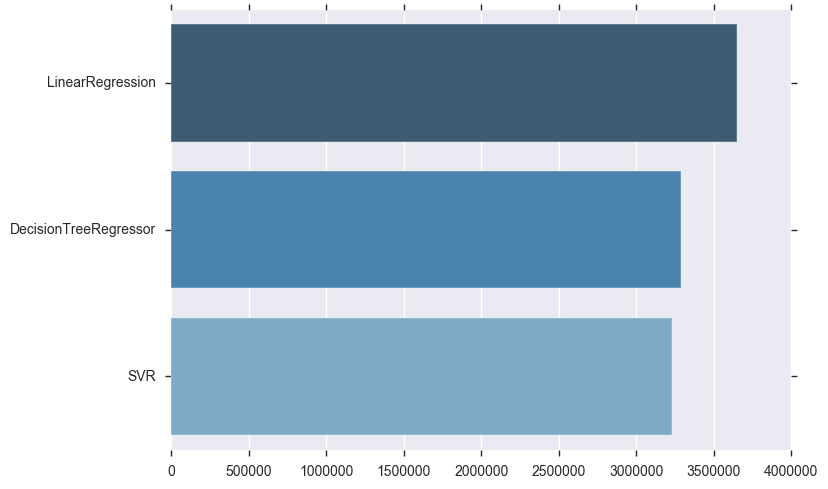

In [185]:
sns.barplot(x=rmse_train_test, y=model_names, palette="Blues_d")

In [186]:
#Prediction

In [187]:
X_2 = test.values

In [134]:
y_2 = svr_regressor.predict(X_2)

In [192]:
s1 = pd.Series(test_Ids)
s2 = pd.Series(y_2)
result = pd.DataFrame({'Id': s1, 'Prediction': s2})
result.set_index(['Id'])

,Prediction
Id,
0,3.870302e+06
1,3.870301e+06
2,3.870302e+06
3,3.870301e+06
4,3.870301e+06
5,3.870302e+06
6,3.870302e+06
7,3.870302e+06
8,3.870302e+06


In [194]:
result.to_csv('to_submit.csv', index=False)